## Load prediction image.

In [3]:
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import keras.utils as image
import cv2

1/1 [==============================] - 0s 100ms/step
Predicted class: 百 [47]
with accuracy 99.59 %
(120, 120, 3)


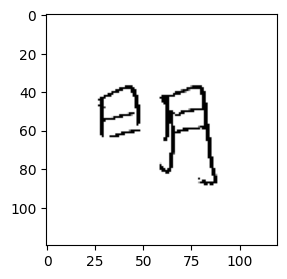

In [6]:


class_name = [
    "日", "一", "国", "人", "年", "大", "十", "二", "本", "中",
    "長", "出", "三", "時", "行", "見", "月", "分", "後", "前",
    "生", "五", "間", "上", "東", "四", "今", "金", "九", "入",
    "学", "高", "円", "子", "外", "八", "六", "下", "来", "気",
    "小", "七", "山", "話", "女", "北", "午", "百", "書", "先",
    "名", "川", "千", "水", "半", "男", "西", "電", "校", "語",
    "土", "木", "聞", "食", "車", "何", "南", "万", "毎", "白",
    "天", "母", "火", "右", "読", "友", "左", "休", "父", "雨", "明"
]

# Load the pre-trained Keras model
model = load_model('./vgg16_unfreeze3.h5')
image_path = './20240310_133732.png'
    

# Function to preprocess an input image to match the model's input size
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    ret, thresh1 = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)  # Apply binary threshold
    thresh1 = cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB)  # Convert back to RGB
    img_array = cv2.resize(thresh1, (120, 120))  # Resize the image
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Make predictions on a single image
def predict_single_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    return predictions

# Example usage
#image_path = './test_img/kuruma_truth.png' 
predictions = predict_single_image(image_path)


print(f"Predicted class: {class_name[np.argmax(predictions)]} [{np.argmax(predictions)}]")
print(f"with accuracy {np.max(predictions)*100:.2f} %")

plt.figure(figsize=(3,3))
im_show = np.squeeze(preprocess_image(image_path), axis=0) # remove that extra dimension
print(im_show.shape)
plt.imshow(im_show, 'gray')

## Preprocessing image method

In [ ]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread(img_path)
plt.imshow(im)

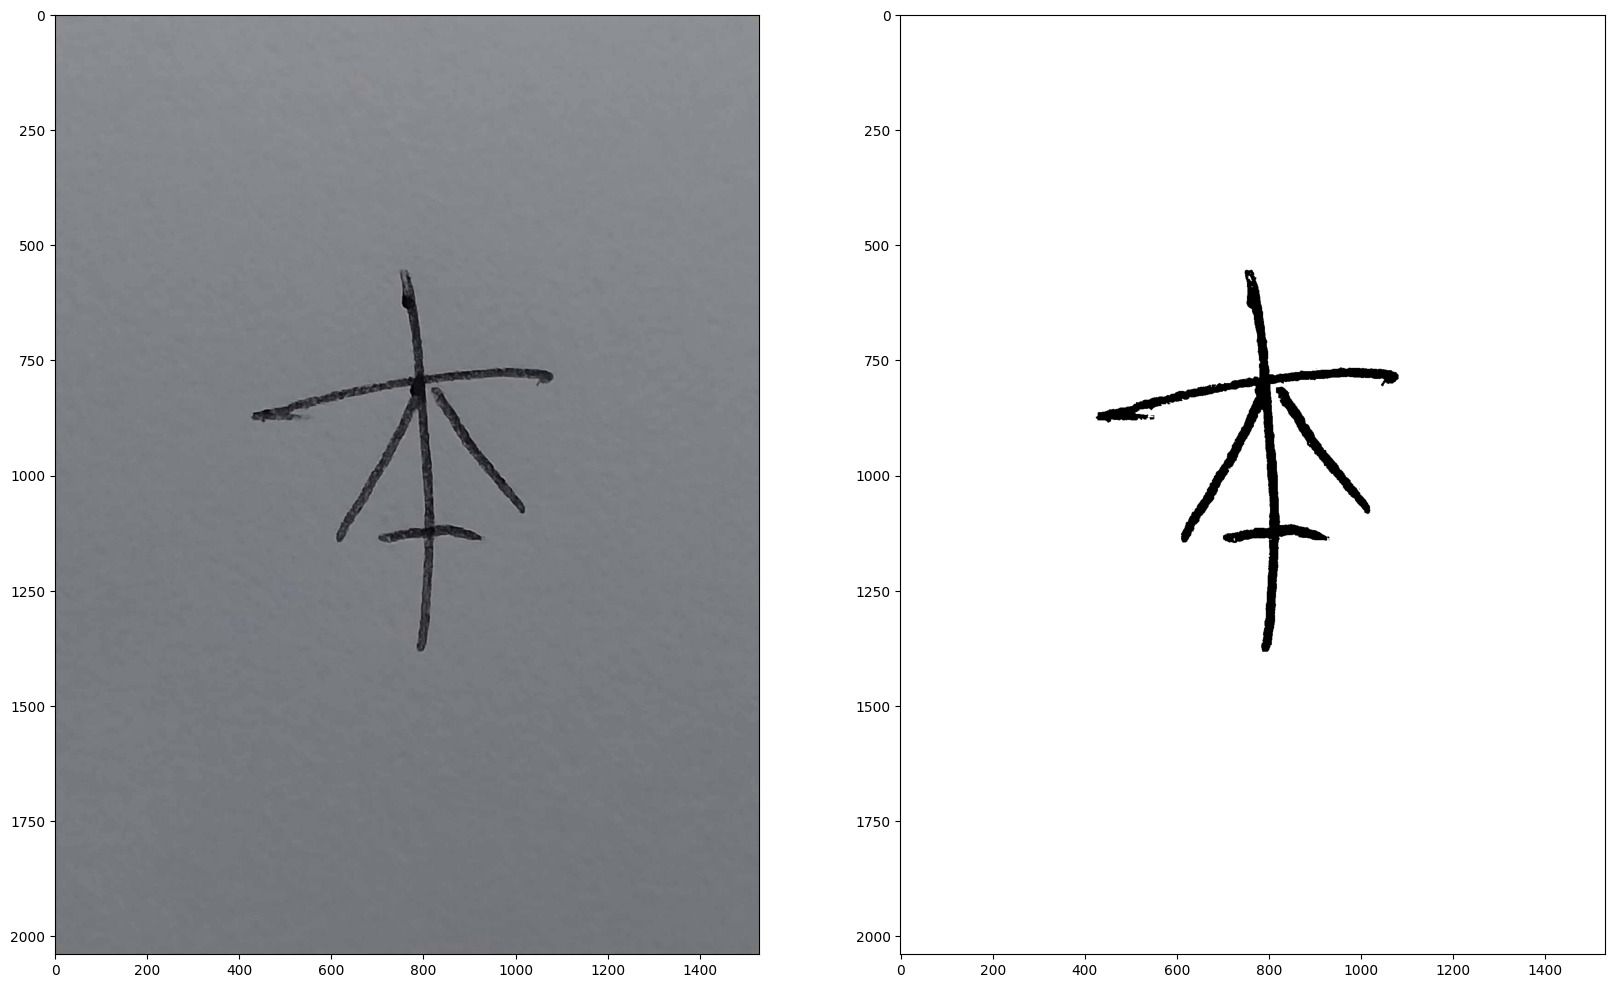

In [25]:
#https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/ 
      
# organizing imports  
import cv2  
import numpy as np  
image1 = cv2.imread('./test_img/hon.jpg')  
  
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 


ret, thresh1 = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 

  

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(image1, 'gray')


plt.subplot(1, 2, 2)
plt.imshow(thresh1, 'gray')


In [8]:
cv2.imwrite('./test_img/gaku_norm.jpg', thresh1)

True